In [2]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk(r"Images"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Images\random_images\download_kheera.jpeg
Images\random_images\ek_aur _kheera.jpeg
Images\random_images\IMG20241229110942.jpg
Images\random_images\IMG20241229110950.jpg
Images\random_images\IMG20241229111043.jpg
Images\random_images\IMG20241229113001.jpg
Images\random_images\IMG20241229113007.jpg
Images\random_images\IMG20241229113202.jpg
Images\random_images\IMG20241229113207.jpg
Images\random_images\IMG20241229113227.jpg
Images\random_images\IMG20241229113239.jpg
Images\random_images\IMG20241229113335.jpg
Images\random_images\IMG20241229113354.jpg
Images\random_images\IMG20241229113524.jpg
Images\test\apple\Image_1.jpg
Images\test\apple\Image_10.jpg
Images\test\apple\Image_2.jpg
Images\test\apple\Image_3.jpg
Images\test\apple\Image_4.jpg
Images\test\apple\Image_5.jpg
Images\test\apple\Image_6.JPG
Images\test\apple\Image_7.jpg
Images\test\apple\Image_8.jpg
Images\test\apple\Image_9.jpg
Images\test\banana\Image_1.jpg
Images\test\banana\Image_10.jpg
Images\test\banana\Image_2.jpg
Images

In [3]:
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import load_img,img_to_array

print(tf.version)

<module 'tensorflow._api.v2.version' from 'c:\\Users\\amanp\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [4]:
train_dir = Path("Images/train")
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

In [5]:
test_dir = Path("Images/test")
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [6]:
val_dir = Path("Images/validation")
val_filepaths = list(val_dir.glob(r'**/*.jpg'))

In [7]:
def image_processing(filepath):

    labels = [str(filepath[i]).split("\\")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    df = pd.concat([filepath, labels], axis=1)

    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [8]:
train_df = image_processing(train_filepaths)
test_df = image_processing(test_filepaths)
val_df = image_processing(val_filepaths)

In [9]:
print('  Training Set  \n')
print(f'Number of pictures: {train_df.shape[0]}\n')
print(f'Number of different labels: {len(train_df.Label.unique())}\n')
print(f'Labels: {train_df.Label.unique()}')

  Training Set  

Number of pictures: 2866

Number of different labels: 36

Labels: ['cucumber' 'carrot' 'garlic' 'watermelon' 'spinach' 'grapes' 'potato'
 'raddish' 'capsicum' 'tomato' 'beetroot' 'pear' 'chilli pepper'
 'pineapple' 'mango' 'cauliflower' 'onion' 'banana' 'orange' 'paprika'
 'eggplant' 'apple' 'bell pepper' 'lettuce' 'jalepeno' 'soy beans' 'corn'
 'sweetcorn' 'pomegranate' 'cabbage' 'sweetpotato' 'peas' 'lemon' 'ginger'
 'kiwi' 'turnip']


In [10]:
train_df.head()

,Filepath,Label
0,Images\train\cucumber\Image_48.jpg,cucumber
1,Images\train\carrot\Image_54.jpg,carrot
2,Images\train\garlic\Image_55.jpg,garlic
3,Images\train\watermelon\Image_27.jpg,watermelon
4,Images\train\spinach\Image_16.jpg,spinach


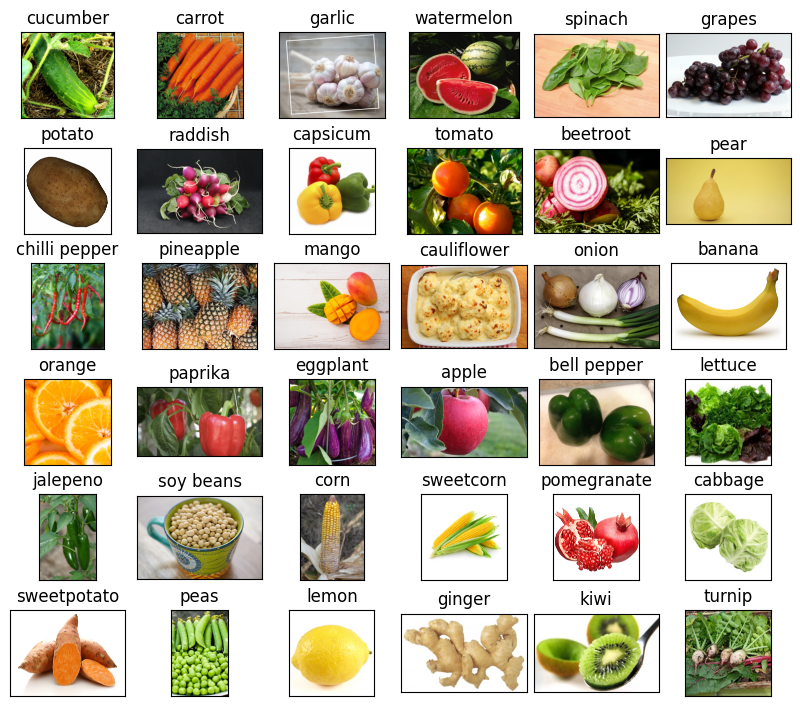

In [11]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.Filepath[i]))
    ax.set_title(df_unique.Label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [13]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 2866 validated image filenames belonging to 36 classes.


In [14]:
val_images = train_generator.flow_from_dataframe(
    dataframe=val_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=0,
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

Found 340 validated image filenames belonging to 36 classes.


In [15]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 340 validated image filenames belonging to 36 classes.


In [16]:
pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [17]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(36, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    batch_size = 32,
    epochs=5,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=2,
            restore_best_weights=True
        )
    ]
)

c:\Users\amanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.3453 - loss: 2.5895 - val_accuracy: 0.8529 - val_loss: 0.4720
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step - accuracy: 0.8115 - loss: 0.5733 - val_accuracy: 0.8529 - val_loss: 0.4441
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8783 - loss: 0.3985 - val_accuracy: 0.9353 - val_loss: 0.2691
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.9376 - loss: 0.2147 - val_accuracy: 0.9706 - val_loss: 0.1990
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9558 - loss: 0.1473 - val_accuracy: 0.9441 - val_loss: 0.2165


In [18]:
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred1 = [labels[k] for k in pred]
pred1

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step


['cucumber',
 'apple',
 'kiwi',
 'jalepeno',
 'orange',
 'soy beans',
 'spinach',
 'lettuce',
 'watermelon',
 'raddish',
 'lemon',
 'grapes',
 'beetroot',
 'sweetpotato',
 'ginger',
 'kiwi',
 'sweetpotato',
 'carrot',
 'apple',
 'corn',
 'cauliflower',
 'pomegranate',
 'ginger',
 'kiwi',
 'tomato',
 'pear',
 'cabbage',
 'capsicum',
 'tomato',
 'watermelon',
 'onion',
 'peas',
 'garlic',
 'peas',
 'paprika',
 'bell pepper',
 'cucumber',
 'beetroot',
 'carrot',
 'watermelon',
 'potato',
 'ginger',
 'onion',
 'raddish',
 'spinach',
 'watermelon',
 'cauliflower',
 'cabbage',
 'tomato',
 'orange',
 'mango',
 'pomegranate',
 'beetroot',
 'pomegranate',
 'spinach',
 'cauliflower',
 'garlic',
 'sweetcorn',
 'jalepeno',
 'turnip',
 'soy beans',
 'onion',
 'jalepeno',
 'pear',
 'capsicum',
 'cauliflower',
 'corn',
 'cauliflower',
 'mango',
 'garlic',
 'cabbage',
 'capsicum',
 'corn',
 'pineapple',
 'mango',
 'mango',
 'chilli pepper',
 'pear',
 'raddish',
 'pomegranate',
 'paprika',
 'lemon',
 '

In [19]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels[y]
    return res

In [20]:
img1 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229110942.jpg')
img2 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229110950.jpg')
img3 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229111043.jpg')
img4 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113001.jpg')
img5 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113202.jpg')
img6 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113207.jpg')
img7 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113227.jpg')
img8 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113239.jpg')
img9 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113335.jpg')
img10 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113354.jpg')
img11 = output(r'C:\Users\amanp\OneDrive\COLLEGE\Major Project - Health-Mate\HealthMateCodeSpace\Images\random_images\IMG20241229113524.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 906ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [21]:
print(img1,img2,img3,img4,img5,img6,img7,img8,img9,img10,img11)

potato potato tomato chilli pepper potato tomato lettuce chilli pepper raddish raddish onion


In [22]:
model.save("fnv_recognition_model.h5")

In [23]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# No augmentation for validation and test sets, just rescaling
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Updated generators using directory structure
train_generator = train_datagen.flow_from_directory(
    'Images/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_test_datagen.flow_from_directory(
    'Images/validation',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    'Images/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3127 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
Found 359 images belonging to 36 classes.


In [24]:

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load the base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,426,596 (9.26 MB)

 Trainable params: 168,612 (658.64 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [25]:

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10


c:\Users\amanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.0554 - loss: 3.6939

c:\Users\amanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.0558 - loss: 3.6916 - val_accuracy: 0.3704 - val_loss: 2.8256
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.2653 - loss: 2.8794 - val_accuracy: 0.6097 - val_loss: 1.9617
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.4587 - loss: 2.1771 - val_accuracy: 0.7407 - val_loss: 1.2807
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.5765 - loss: 1.6476 - val_accuracy: 0.7778 - val_loss: 0.9107
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.6431 - loss: 1.2721 - val_accuracy: 0.8319 - val_loss: 0.7132
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.6869 - loss: 1.0953 - val_accuracy: 0.8632 - val_loss: 0.5941
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7078 - loss: 1.0066 - val_accuracy: 0.8775 - val_loss: 0.5222
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.7348 - loss: 0.9033 - val_accuracy: 0.9031 - val_loss: 0.

In [26]:

import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    predictions = model.predict(img_array)
    confidence = np.max(predictions)
    predicted_class = np.argmax(predictions)

    if confidence < 0.6:
        print("This image is not confidently recognized as a fruit or vegetable.")
    else:
        class_labels = list(train_generator.class_indices.keys())
        print(f"Prediction: {class_labels[predicted_class]} ({confidence:.2f} confidence)")

# Example usage:
# predict_image('path/to/your/test/image.jpg')



**Suggestion**: To improve recognition of unknown objects, consider adding an `"unknown"` class with random non-fruit/vegetable images. This helps the model learn what "not a fruit or vegetable" looks like.


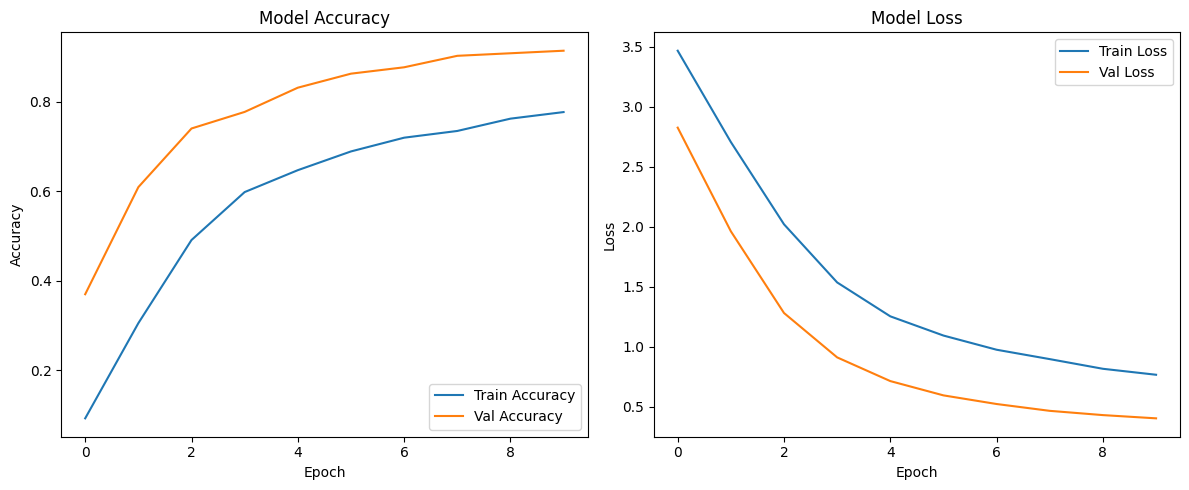

In [27]:

import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [29]:

# Save the model in HDF5 format
model.save('fruit_veg_model_updated.h5')

# Save as a TensorFlow SavedModel (directory format)
model.save('fruit_veg_saved_model.keras')


In [31]:

# Convert the model to TensorFlow Lite
# converter = tf.lite.TFLiteConverter.from_saved_model('fruit_veg_saved_model')
# tflite_model = converter.convert()

# # Save the TFLite model
# with open('fruit_veg_model.tflite', 'wb') as f:
#     f.write(tflite_model)

# print("TFLite model saved as 'fruit_veg_model.tflite'")



> 💡 To export for web using **TensorFlow.js**, install the converter:
> 
> ```bash
> pip install tensorflowjs
> tensorflowjs_converter --input_format=tf_saved_model fruit_veg_saved_model web_model/
> ```
